In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Input, UpSampling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

print('TF version: ', tf.__version__)
print('Eager execution enabled: ', tf.executing_eagerly())

TF version:  2.11.0
Eager execution enabled:  True


x_train shape: (60000, 28, 28) y_train shape: (60000,)


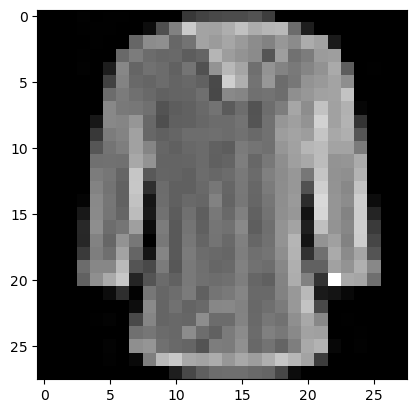

In [2]:
# import data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print('x_train shape:', x_train.shape, 'y_train shape:', y_train.shape)
plt.gray()
plt.imshow(x_test[4]);

In [3]:
# normalize data
from keras.utils import to_categorical
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.reshape(x_train, x_train.shape + (1,))
x_test = np.reshape(x_test, x_test.shape + (1,))
print('x_train shape:', x_train.shape, 'x_test shape:', x_test.shape)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('y_train shape:', y_train.shape, 'y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28, 1) x_test shape: (10000, 28, 28, 1)
y_train shape: (60000, 10) y_test shape: (10000, 10)


In [4]:
# define model
def cnn_model():
    x_in = Input(shape=(28, 28, 1))
    x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x_in)
    x = MaxPooling2D(pool_size=2)(x)
    
    x = Conv2D(filters=64, kernel_size=5, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=3)(x)
    x = Dropout(0.3)(x)
    
    x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x_out = Dense(10, activation='softmax')(x)
    
    cnn = Model(inputs=x_in, outputs=x_out)
    cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return cnn

In [5]:
# train model
cnn = cnn_model()
cnn.fit(x_train, y_train, batch_size=100, epochs=50, verbose=1)

Epoch 1/50
600/600 [==============================] - 26s 42ms/step - loss: 0.6660 - accuracy: 0.7555
Epoch 2/50
600/600 [==============================] - 26s 43ms/step - loss: 0.4073 - accuracy: 0.8501
Epoch 3/50
600/600 [==============================] - 25s 41ms/step - loss: 0.3454 - accuracy: 0.8728
Epoch 4/50
600/600 [==============================] - 26s 43ms/step - loss: 0.3137 - accuracy: 0.8845
Epoch 5/50
600/600 [==============================] - 26s 44ms/step - loss: 0.2913 - accuracy: 0.8916
Epoch 6/50
600/600 [==============================] - 26s 43ms/step - loss: 0.2763 - accuracy: 0.8982
Epoch 7/50
600/600 [==============================] - 25s 42ms/step - loss: 0.2633 - accuracy: 0.9021
Epoch 8/50
600/600 [==============================] - 26s 43ms/step - loss: 0.2525 - accuracy: 0.9068
Epoch 9/50
600/600 [==============================] - 25s 42ms/step - loss: 0.2439 - accuracy: 0.9096
Epoch 10/50
600/600 [==============================] - 26s 43ms/step - loss: 0.235

In [6]:
# test model with test data
score = cnn.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: ', score[1]*100)

Test accuracy:  92.5499975681305


In [8]:
# save the model
cnn.save('fmnist_cnn.h5', save_format='h5')
print("Model saved")

Model saved


In [9]:
# load the model
model = load_model('fmnist_cnn.h5')
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: ', score[1]),x_test.shape

Test accuracy:  0.9254999756813049


(None, (10000, 28, 28, 1))